# Linear Regression

- Generate dummy [x,y] values
- Create model by tensorflow


In [259]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## prepare - training data

In [260]:
# generate 50 size dataset(x, y=h(x))
# add noise to dataset(x, y)
# graph dataset(x, y)

x = np.linspace(0, 50, 50)   #0 to 50, 50 sample, float
y = np.linspace(0, 50, 50)


print('x', x[0:5])
print('y', y[0:5])

x [0.         1.02040816 2.04081633 3.06122449 4.08163265]
y [0.         1.02040816 2.04081633 3.06122449 4.08163265]


In [261]:
# add noise

x += np.random.default_rng(1).random(50)
y += np.random.default_rng(1).uniform(-5, 5, 50)

print('x', x[0:5])
print('y', y[0:5])

print('shape', x.shape, y.shape)

x [0.51182162 1.97087186 2.18497594 4.00987394 4.39346411]
y [ 0.11821625  5.52504513 -1.51758755  7.54771896  2.19994717]
shape (50,) (50,)


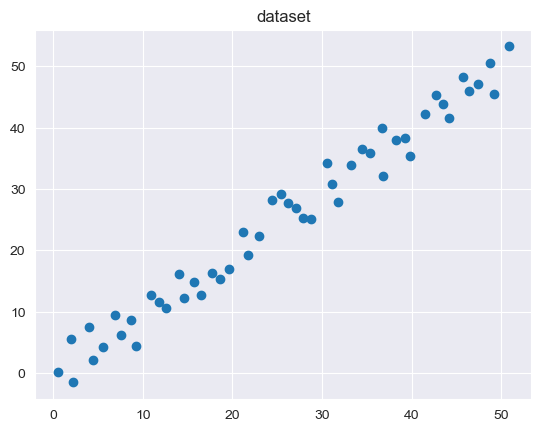

In [262]:
plt.scatter(x, y)

plt.xlabel = "x"
plt.ylabel = "y"
plt.title("dataset")
plt.show()

## model

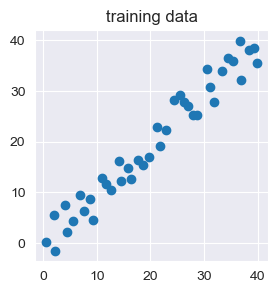

In [263]:
# sampling
# split data as train and test set

x_train = x[0:40]
y_train = y[0:40]

x_test = x[40:]
y_test = y[40:]

plt.figure(figsize=(3,3))
plt.title("training data")
plt.scatter(x_train, y_train)
plt.show()

In [264]:
# reshape numpy arrays

x_train = np.array(x_train).reshape((-1,1))   # (40,) -> (40, 1)
y_train = np.array(y_train)                   # (40,)

print(np.shape(x_train), np.shape(y_train))

(40, 1) (40,)


In [265]:
# create a sequential model

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

# hypothesis
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1))

# optimizer # loss
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001),
              loss=tf.keras.losses.mse)

# train
train = model.fit(x_train, y_train, epochs=50)



Epoch 1/50
2/2 [==============================] - 0s 11ms/step - loss: 25.2793
Epoch 2/50
2/2 [==============================] - 0s 5ms/step - loss: 17.9186
Epoch 3/50
2/2 [==============================] - 0s 5ms/step - loss: 14.1941
Epoch 4/50
2/2 [==============================] - 0s 4ms/step - loss: 11.2125
Epoch 5/50
2/2 [==============================] - 0s 4ms/step - loss: 9.5687
Epoch 6/50
2/2 [==============================] - 0s 4ms/step - loss: 8.3496
Epoch 7/50
2/2 [==============================] - 0s 4ms/step - loss: 7.7505
Epoch 8/50
2/2 [==============================] - 0s 4ms/step - loss: 7.2585
Epoch 9/50
2/2 [==============================] - 0s 4ms/step - loss: 7.0278
Epoch 10/50
2/2 [==============================] - 0s 5ms/step - loss: 6.9023
Epoch 11/50
2/2 [==============================] - 0s 6ms/step - loss: 6.7348
Epoch 12/50
2/2 [==============================] - 0s 4ms/step - loss: 6.6892
Epoch 13/50
2/2 [==============================] - 0s 5ms/step - los

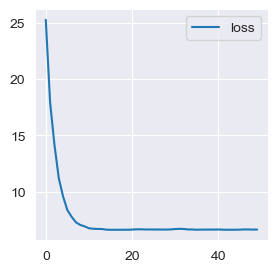

In [266]:
# performance analysis

plt.figure(figsize=(3,3))
plt.plot(train.history['loss'], label="loss")
plt.legend()
plt.show()

1/1 [==============================] - 0s 65ms/step


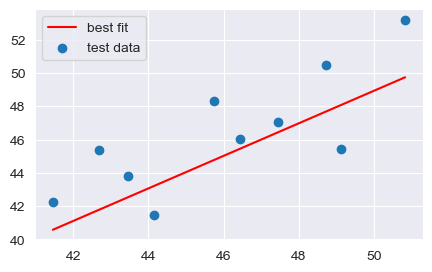

In [267]:
# test the model

y_pred = model.predict(np.reshape(x_test, newshape=(-1,1)))

plt.figure(figsize=(5,3))
plt.plot(x_test, y_pred, color="red", label="best fit")

plt.scatter(x_test, y_test, label= "test data")
plt.legend()
plt.show()